[Indice](index.ipynb) | Previo: [Aplicaciones.OndasGravitacionales.EcuacionDeOndas](03.01.03.00.Aplicaciones.OndasGravitacionales.EcuacionDeOndas.ipynb) | Siguiente: [Aplicaciones.OndasGravitacionales.SimulacionSenal](03.01.05.00.Aplicaciones.OndasGravitacionales.SimulacionSenal.ipynb)

### 3.1.14. Geodésicas en una onda gravitacional
<a id='geodesicas_gw'></a>

Cuando una onda gravitacional para por un punto del espacio en el que se encuentra una partícula de prueba, la ecuación de movimiento de la partícula es:

$$
\frac{\mathrm{d^2} x^\mu}{\mathrm{d}\tau^2} = - \Gamma^\mu_{\alpha\gamma} \frac{\mathrm{d} x^\alpha}{\mathrm{d}\tau}\frac{\mathrm{d} x^\gamma}{\mathrm{d}\tau}
$$

¿Que trayectoria describirá?

Consideremos un ejemplo numérico.  Para ello definamos la geodésica de una onda gravitacional plana solo con polarización más, ie. $a_\times=0$:

In [1]:
from numpy import array
def g_gw_plana(xmu,mu,omega=1,aplus=0,fi=0):
    """
    Coeficiente métrico g_mumu calculados en el evento xmu 
    para espacio-tiempo plano con coordenadas cilíndricas.
    
    g_munu=diag(1,
                -[1+f(u)],
                -[1-f(u)],
                -1
                )+cross_xy([1+r(u)],[1+r(u)])
    """
    from numpy import cos
    t,x,y,z=xmu
    u=t-z #Unidades luz
    k=omega #En unidades luz k = omega
    fu=aplus*cos(k*u+fi)
    if mu==0:
        g=1
    elif mu==1:
        g=-(1+fu)
    elif mu==2:
        g=-(1-fu)
    elif mu==3:
        g=-1
    return g

Ahora definamos las condiciones iniciales para una partícula que se encuentra sobre el eje x en $t=0$:

In [2]:
#Condiciones iniciales
Y0s=array([0.0,1.0,1.0,0.0,
           1.0,0.0,0.0,0.0])

#Tiempo de integración
from numpy import linspace
ss=linspace(0,10,100)

Asumimos que la onda se propaga en dirección del eje x y que tiene las siguientes propiedades:

In [3]:
#Frecuencia en rad/s
omega=1

#Fase inicial
fi=0

#Amplitud (polarizacion)
aplus=1e-3

Podemos calcular las componentes de los símbolos de Christoffel para verificar que (en las coordenadas que estamos utilizando) son distintos de cero:

In [4]:
from export import Gamma
xmu=[1,1,0,0]
G=Gamma(xmu,g_gw_plana,gargs=(omega,aplus,fi),N=4)

In [5]:
print(f"Símbolos de Christoffel:\n{G}")

Símbolos de Christoffel:
[[[-0.          0.          0.          0.        ]
  [ 0.         -0.00042074  0.          0.        ]
  [ 0.          0.          0.00042074  0.        ]
  [ 0.          0.          0.         -0.        ]]

 [[ 0.         -0.00042051  0.          0.        ]
  [-0.00042051  0.         -0.          0.00042051]
  [ 0.         -0.          0.          0.        ]
  [ 0.          0.00042051  0.          0.        ]]

 [[ 0.          0.          0.00042096  0.        ]
  [ 0.          0.         -0.          0.        ]
  [ 0.00042096 -0.          0.         -0.00042096]
  [ 0.          0.         -0.00042096  0.        ]]

 [[ 0.          0.          0.         -0.        ]
  [ 0.         -0.00042074  0.         -0.        ]
  [ 0.          0.          0.00042074 -0.        ]
  [-0.         -0.         -0.          0.        ]]]


Resolvemos ahora la ecuación de la geodésica:

In [6]:
#Integra la ecuación de la geodésica
from scipy.integrate import odeint
from export import ecuacion_geodesica
N=4
Ys=odeint(ecuacion_geodesica,Y0s,ss,args=(g_gw_plana,(1,0,0.1),N))

#Convierte solución en coordenadas esféricas
ts=Ys[:,0]
xs=Ys[:,1]
ys=Ys[:,2]
zs=Ys[:,3]

In [7]:
from numpy import set_printoptions
set_printoptions(threshold=5)
print(f"Coordenadas x: {xs}")
print(f"Coordenadas y: {ys}")

Coordenadas x: [1. 1. 1. ... 1. 1. 1.]
Coordenadas y: [1. 1. 1. ... 1. 1. 1.]


Curiosamente descubrimos que aunque hay una onda gravitacional atravesando el espacio-tiempo donde se encuentra la partícula, la onda no modifica la posición de la misma.  ¿Cómo es posible esto?

Volvamos nuevamente a la ecuación geodésica y consideremos solamente la componente espacial de la ecuación perturbada:

$$
\frac{\mathrm{d^2} \delta x^i}{\mathrm{d}\tau^2} = - \delta\Gamma^i_{\alpha\gamma} \frac{\mathrm{d} x^\alpha}{\mathrm{d}\tau}\frac{\mathrm{d} x^\gamma}{\mathrm{d}\tau}
$$

Como la partícula se encuentra en reposo entonces $U^\alpha=(1,0,0,0)$ y por lo tanto:

$$
\frac{\mathrm{d^2} \delta x^i}{\mathrm{d}\tau^2} = - \delta\Gamma^i_{tt} 
$$

Pero sabemos que:

$$
\delta\Gamma^i_{tt}=-\frac{1}{2}\eta^{ii} h_{tt,i}=0
$$

De modo que la partícula no va a ningún lugar:

$$
\frac{\mathrm{d^2} \delta x^i}{\mathrm{d}\tau^2} = 0
$$

### 3.1.15. Distancias en una onda gravitacional
<a id='distancias_gw'></a>

Aunque las coordenadas de partículas de prueba puestas en reposo espacial en el camino de una onda gravitacional no se ven perturbadas, la distancia entre ellas cuenta otra historia.

Supongamos que tenemos una partícula de referencia puesta en el origen de un sistema de coordenadas cartesiano.  Vamos a colocar partículas en el espacio alrededor de esa partícula.

La distancia entre el origen y la partícula ubicada en la posición $(x,y,z)$ será:

$$
L=\int_{L_0} dl=\int_{L_0} \sqrt{g^{xx}\;\mathrm{d}x^2+g^{yy}\;\mathrm{d}y^2+g^{xy}\;\mathrm{d}x\mathrm{d}y+g^{zz}\;\mathrm{d}z^2}
$$

Consideremos algunos casos sencillos.  Calculemos por ejemplo la distancia a un punto sobre el eje $x$, para una onda con polarización $a_+$:

$$
L=\int_{L_0} \mathrm{d}x\sqrt{g^{xx}}=L_0 \sqrt{1+h(u)}\approx L_0\left(1+\frac{1}{2}h(u)\right)
$$
cond $u=ct-z$.

<a id='fig:Figure_40'></a>![Ilustración gráfica de cómo al paso de una onda gravitacional las coordenadas de las partículas de prueba se mantienen constantes pero su distancia mutua cambia con el tiempo.](./figures/horizontal-gw-deteccion.png)

<center><b>Figura 3.40</b>. Ilustración gráfica de cómo al paso de una onda gravitacional las coordenadas de las partículas de prueba se mantienen constantes pero su distancia mutua cambia con el tiempo.</center>

Como vemos aunque la posición de las partículas no se modifica, su distancia si cambia sutilmente.  

El cambio relativo en la distancia entre ellas (nótese que $L_\star$ sería la distancia si el espacio-tiempo fuera plano), que llamaremos la **deformación** o en inglés **strain** producido por el paso de la onda  será:

$$
\frac{\delta L(u)}{L_0}=\frac{1}{2}h(u)=\frac{1}{2}a_{+}\cos(k u + \varphi)
$$

Podemos definir la rutina para $h$ así:

In [11]:
from numpy import cos
h=lambda t,z,omega,aplus,fi:aplus*cos(omega*(t-z)+fi)

Y hacer un gráfico de la distancia:

In [12]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


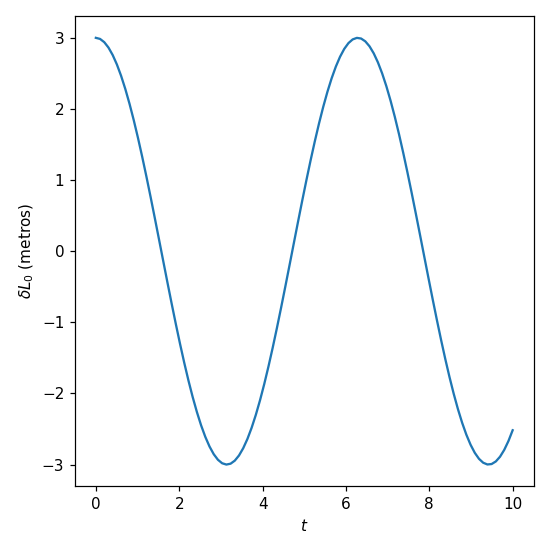

In [13]:
# Distancia "propia"
L0=6000 # metros= 6 km

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
ax.plot(ss,0.5*h(ss,0,omega,aplus,fi)*L0)

#Decoración
ax.set_xlabel("$t$");
ax.set_ylabel("$\delta L_0$ (metros)");
fig.tight_layout()

<a id='fig:03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion_41'></a><center><b>Figura 3.41.</b> </center>

Esta situación puede generalizarse de forma sencilla a un punto ubicado en cualquier lugar sobre un plano perpendicular a la onda:

$$
\frac{\delta L(u)}{L_0}=\frac{1}{2}h_{ij}(u)n^i n^j
$$
donde $\hat n:(n_x,n_y)$ es un vector unitario en dirección al punto.

Definamos una rutina para la onda:

In [44]:
def hij(i,j,t,z,omega=1,aplus=0,across=0,fi=0):
    k=omega
    cosu=cos(k*(t-z)+fi)
    if i==3 or j==3:return 0
    if i!=j:h=across*cosu
    elif i==1:h=aplus*cosu
    elif i==2:h=-aplus*cosu
    return h

Si construyo entonces un grid de puntos situados en coordenadas tal que su distancia convencional a la partícula central sea $R$, entonces al paso de la onda su distancia real será:

$$
R(u)=R\left(1+\frac{\delta L(u)}{L_0}\right)=R\left[1+\frac{1}{2}h_{ij}(u)n^i n^j\right]
$$

Y sus coordenadas serán:

$$
\begin{array}{rcl}
X(u) & = & R(u) n^x\\
Y(u) & = & R(u) n^y
\end{array}
$$

Veamos lo que pasa con un conjunto de puntos situados a una distancia constante del origen con el siguiente algoritmo:

In [57]:
#Distancia en espacio plano al origen
R=1e-4

#Tiempo y z
t=0
z=0

#Posición de los puntos
from numpy import linspace,pi,cos,sin
Np=40
qs=linspace(0,2*pi,Np)

#Vectores unitarios de posición
nxs=cos(qs)
nys=sin(qs)

#Posiciones sin modificar
xs=R*nxs
ys=R*nys

#Propiedades de la onda
omega=1.0
aplus=0.3
across=0.0
fi=0
hargs=omega,aplus,across,fi

#Distancias modificadas por el paso de la onda
Rs=R*(1+0.5*(hij(1,1,t,z,*hargs)*nxs*nxs+
             hij(2,2,t,z,*hargs)*nys*nys+
             2*hij(1,2,t,z,*hargs)*nxs*nys))

#Posiciones modificadas
Xs=Rs*nxs
Ys=Rs*nys

Ahora grafiquemos:

<IPython.core.display.Javascript object>


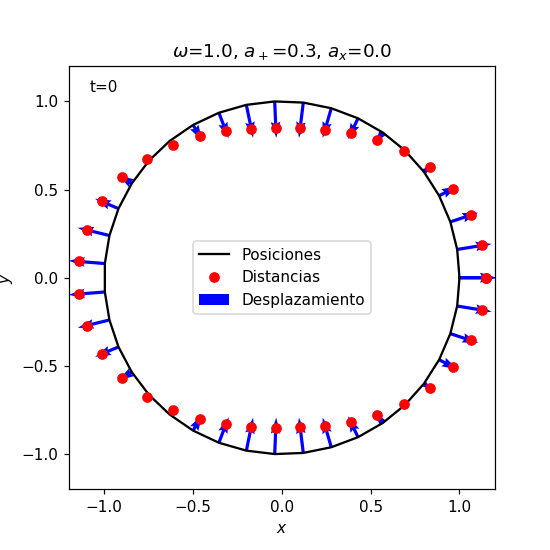

In [58]:
#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()
#ax.plot(Xs-xs,Ys-ys,'ko')
ax.plot(xs/R,ys/R,'k-',label="Posiciones")
ax.plot(Xs/R,Ys/R,'ro',label="Distancias")
ax.quiver(xs/R,ys/R,(Xs-xs)/R,(Ys-ys)/R,
          color='b',angles='xy',scale_units='xy',
          label="Desplazamiento")

#Decoración
ax.legend()
rango=1.2
ax.set_xlim(-rango,rango)
ax.set_ylim(-rango,rango)
ax.set_xlabel("$x$");
ax.set_ylabel("$y$");
ax.text(0.05,0.95,f"t={t}",
        ha="left",va="center",
        transform=ax.transAxes);
ax.set_title(f"$\omega$={omega}, $a_+$={aplus}, $a_x$={across}",
             fontsize=12);

<a id='fig:03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion_42'></a><center><b>Figura 3.42.</b> </center>

Para gráficos animados de esta figura vea la [versión electrónica del libro](http://github.com/seap-udea/Relatividad-Zuluaga).

Ahora podemos animar el paso de la onda gravitacional:

<IPython.core.display.Javascript object>


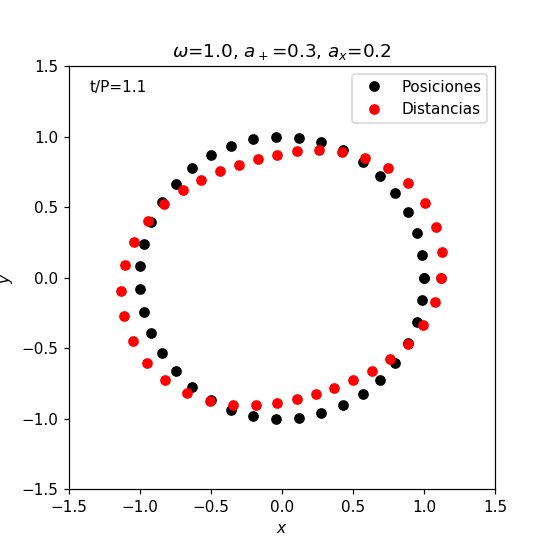

In [60]:
#Propiedades de la onda
omega=1.0
aplus=0.3
across=0.2
fi=0
hargs=omega,aplus,across,fi
P=2*pi/omega

#Gráfico básico
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
ax=fig.gca()

#Cantidades que no dependen del tiempo
from numpy import linspace,pi,cos,sin
Np=40
qs=linspace(0,2*pi,Np)

#Vectores unitarios
nxs=cos(qs)
nys=sin(qs)

#Puntos de referencia
ax.plot(nxs,nys,'ko',label="Posiciones")

#Puntos al paso de la onda
puntos,=ax.plot([],[],'ro',label="Distancias")

#Tiempo
texto=ax.text(0.05,0.95,f"t={t}",
              ha="left",va="center",
              transform=ax.transAxes);

#Decoración
ax.legend()
rango=1.2+aplus
ax.set_xlim(-rango,rango)
ax.set_ylim(-rango,rango)
ax.set_xlabel("$x$");
ax.set_ylabel("$y$");
ax.set_title(f"$\omega$={omega}, $a_+$={aplus}, $a_x$={across}",
             fontsize=12)

#Tiempos
from numpy import linspace,pi
Nt=120
ts=linspace(0,1.1*P,Nt)

#Distancia en espacio plano al origen
R=1e-4

#Posición en z
z=0

#Rutina de animación:
def animacion(i):
    
    #Tiempo
    t=ts[i]

    #Distancias modificadas por el paso de la onda
    Rs=R*(1+0.5*(hij(1,1,t,z,*hargs)*nxs*nxs+
                 hij(2,2,t,z,*hargs)*nys*nys+
                 2*hij(1,2,t,z,*hargs)*nxs*nys))

    #Posiciones modificadas
    Xs=Rs*nxs
    Ys=Rs*nys

    puntos.set_data(Xs/R,Ys/R)
    texto.set_text(f"t/P={t/P:.2g}")
    
    return puntos,texto

#animacion(50)
from matplotlib import animation
anim=animation.FuncAnimation(fig,animacion,frames=Nt,interval=50,blit=True,repeat=False)

<a id='fig:03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion_43'></a><center><b>Figura 3.43.</b> </center>

Podemos generar un gráfico en el que tengamos un poco más de control:

In [25]:
from IPython.display import HTML
from matplotlib import rcParams 
rcParams['animation.embed_limit']=2**128
HTML(anim.to_jshtml())

### 3.1.16. Detectores de ondas gravitacionales
<a id='detectores_gw'></a>

Pueden encontrar buenos artículos de la historia de la detección de ondas gravitacionales, por ejemplo [este](https://arxiv.org/pdf/1609.09400.pdf).

Los primeros detectores que se intentaron construir usaban el hecho que la distancia entre las partículas de prueba al paso de una onda oscilaban periódicamente.  Si se lograba que una onda resonara con alguna frecuencia fundamental en un material se podía detectar la onda.  Este fue por ejemplo el caso del diseño de Joseph Weber que construyo su detector a finales de 1970.  Según él detecto las ondas procedentes del centro de la galaxia en 1970, pero la frecuencia de esas mismas ondas no coincidían con lo esperado.

<a id='fig:Figure_44'></a>![Detector de ondas gravitacionales de Joseph Weber](./figures/square_gw_weber.png)

<center><b>Figura 3.44</b>. Detector de ondas gravitacionales de Joseph Weber</center>

En los años 60 se introdujo la idea de usar un arreglo interferométrico para detectar las ondas usando un sencillo principio (ver Figura abajo).

<a id='fig:Figure_45'></a>![Diseño básico para un interferometro de ondas gravitacionales como el que usa hoy el LIGO](./figures/horizontal_gw_inteferometer.png)

<center><b>Figura 3.45</b>. Diseño básico para un interferometro de ondas gravitacionales como el que usa hoy el LIGO</center>

En este caso los espejos juegan el papel de las masas de prueba y el *beam splitter* representa el origen de coordenadas.

La idea del interferómetro es medir usando interferencia la diferencia entre la distancia, medida a lo largo de una geodésica nula en ambas direcciones, entre el origen de coordenadas (el beam splitter) y los espejos puestos en dirección perpendicular uno de otro.

Para ondas gravitacionales que se propaguen en dirección perpendicular al interferometro, las ondas electromagnéticas en cada brazo podemos suponer que tienen una componente horizontal del campo eléctrico, después de recorrer la totalidad del brazo igual a:

$$
\begin{array}{rcl}
E_x^{(L_y)} & = & E_0\sin[k_{L}(ct-L_y)]\\
E_x^{(L_x)} & = & E_0\sin[k_{L}(ct-L_x)]\\
\end{array}
$$
donde $k_L=2\pi/\lambda$. 

Cuando los haces interfieren en el origen su campo será:

$$
E_x=E_0 \{\sin[k_{L}(ct-L_x)]+\sin[k_{L}(ct-L_y)])\}
$$

Usando la identidad:

$$
\sin\theta+\sin\phi=
2\sin\left(\frac{\theta+\phi}{2}\right)
\cos\left(\frac{\theta-\phi}{2}\right)
$$
el campo total queda:

$$
E_x=2E_0\sin\left[k_L \left(c t - \frac{L_x+L_y}{2}\right)\right]\cos\left[\frac{1}{2}k_L(L_y-L_x)\right]
$$

La intensidad promedio de la onda en el vació será:

$$
I=\frac{c\epsilon_0}{2}\langle|E|^2\rangle 
$$
donde $\epsilon_0$ es la permitividad eléctrica del vacío y debemos promediar sobre un período de la onda electromagnética.  

El resultado será:

$$
I=I_0 \cos^2\left[\frac{1}{2}k_L(L_y-L_x)\right]
$$
donde $I_0$ es la máxima intensidad de la interferencia entre las señales, que se produce cuando $L_y=L_x$ y las dos ondas llegan en fase.

Sabiendo que:

$$
L_i=L_0+\delta L_i
$$
entonces

$$
L_y-L_x\equiv\Delta L=\delta L_y-\delta L_x
$$
y la intensidad se puede finalmente escribir como:

$$
I=\frac{1}{2}I_0\left[1+\cos\left(2\pi\frac{\Delta L}{\lambda}\right)\right]
$$

Definiendo $\delta I/I_0\equiv1-I/I_0$ entonces:

$$
\frac{\delta I}{I_0}=\frac{1}{2}\left[1-\cos\left(2\pi\frac{\Delta L}{\lambda}\right)\right]
$$

#### 3.1.16.1. Sensibilidad de los detectores
<a id='sensibilidad_detectores'></a>

En el caso de una onda realista $\Delta L\ll \lambda$ y podemos usar una expansión en series de potencias del coseno para escribir:

$$
\frac{\delta I}{I_0}=\pi^2\left(\frac{\Delta L}{\lambda}\right)^2
$$

Si asumimos las mejores condiciones para la detección, es decir que la incidencia es normal y la polarización de la onda esta alineada con los brazos del detector, podemos escribir:

$$
\Delta L=\Delta L_\mathrm{max}\cos(ku+\phi)
$$
de donde:

$$
\frac{\delta I}{I_0}=\pi^2 \left(\frac{\Delta L_\mathrm{max}}{\lambda}\right)^2\cos^2(ku+\phi)
$$

De modo que de lo que se trata es de detectar cambios en la intensidad increíblemente pequeño que se repiten con el tiempo (factor oscilatorio) con una frecuencia el doble que la frecuencia de la onda.

El LIGO (*Laser Interferometer Gravitational Observatory*) es actualmente sensible a cambios relativos $\Delta L_\mathrm{max}$ similares e incluso menores a 1 mil millonesima de la luz visible ($\lambda\approx 600$ nm), esto permite detectar cambios en la longitud de sus brazos tan pequeños como:

$$
\Delta L_\mathrm{max} \lesssim 10^{-9}\times 6\times 10^{-7}\;\mathrm{m} = 6\times10^{-16}\;\mathrm{m}
$$

Un gráfico de la señal de interferencia, para esta situación óptima, se muestra en la figura:

<IPython.core.display.Javascript object>


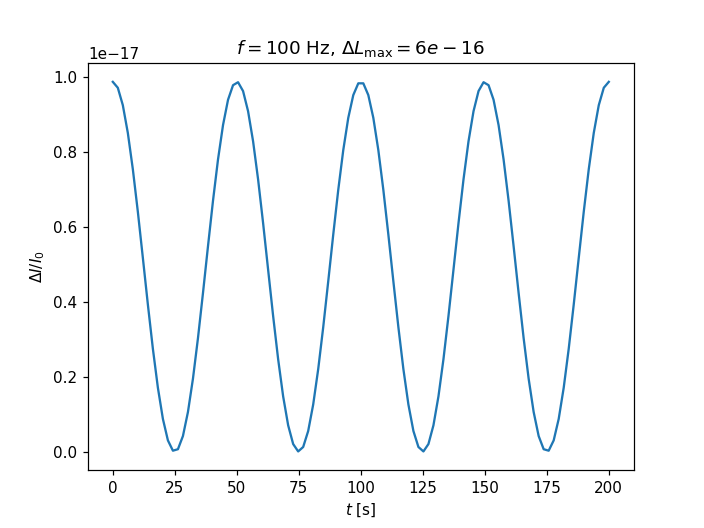

In [24]:
#Constantes
c=3e8

# Propiedad del detector
lamb=6e-7 # Longitud de onda

#Propiedades de la onda
f=100 # Hertz
DLmax=6e-16 # Máxima amplitud de la señal
z=0
fi=0

#Propiedades derivadas de la onda
from numpy import pi
k=2*pi*f/c # Número de onda
P=1/f # Período en segundos

#Gráfico de la señal
fig=plt.figure()
ax=fig.gca()

from numpy import linspace,cos
ts=linspace(0,2*f,100)
ax.plot(ts,pi**2*(DLmax/lamb)**2*cos(k*(c*ts-z+fi))**2)

#Decoración
ax.set_title(f"$f={f}$ Hz, $\Delta L_\mathrm{{max}}={DLmax}$")
ax.set_xlabel("$t$ [s]");
ax.set_ylabel("$\Delta I/I_0$");

<a id='fig:03.01.04.00.Aplicaciones.OndasGravitacionales.Deteccion_46'></a><center><b>Figura 3.46.</b> </center>

La sensibilidad a la amplitud de la onda que llamaremos $|h_\mathrm{min}|$, es decir, la amplitud de la onda gravitacional más pequeña que puede percibir el detector, dependerá finalmente de la longitud de los brazos del interferómetro:

$$
|h_\mathrm{min}|\sim\frac{\delta L}{L} \approx \frac{\Delta L_\mathrm{max}}{L}
$$
entre más largo los brazos, mayor será la sensibilidad. 

LIGO usa brazos de 4 km de longitud pero usa un artificio óptico conocido como cavidades resonantes de Fabri-Perot (ver figura abajo) que aumenta la longitud efectiva del brazo hasta $L=1200$ km, de modo que la sensibilidad de LIGO avanzado es del orden de:

$$
|h_\mathrm{min}| \approx \frac{\Delta L_\mathrm{max}}{L} \sim 10^{-21}
$$

<a id='fig:Figure_47'></a>![Diseño real de un interferometro de ondas gravitacionales como el que usa hoy el LIGO](./figures/square-LIGO-simplificado.png)

<center><b>Figura 3.47</b>. Diseño real de un interferometro de ondas gravitacionales como el que usa hoy el LIGO</center>

Las ondas detectables en LIGO serán aquellas que produzcan un *strain* mínimo mayor que el strain correspondiente al riudo del detector.  Pero dado que la detección no se hace en una única frecuencia como hemos explicado hasta aquí, la sensibilidad a la amplitud de una onda no se puede representar simplemente como un *strain* mínimo.  En lugar de ello se usa la que se conoce como la *densidad espectral* del ruido $S_n(f)$ (cantidad de ruido por unidad de frecuencia), en función de la cuál, el strain correspondiente al ruído será (ver [esta referencia](https://arxiv.org/pdf/1408.0740.pdf)):

$$
h_n(f) = f^{1/2} \sqrt{S_n(f)}
$$
donde $f$ es la frecuencia de la onda gravitacional.

Para la detección de una onda es necesario que:

$$
|h_\mathrm{min}(f)|>h_n(f)
$$

Normalmente lo que se representa para caracterizar la sensibilidad de los instrumentos es $\sqrt{S_n(f)}$ que se conoce como la *amplitud de densidad espectral* y que tiene unidades de inverso de $\mathrm{Hz}^{-1/2}$.


Por eso cuando se trata de entender la sensibiliad usando gráficos como los que se muestran abajo, es necesario multiplicar la sensibilidad provista por el gráfico por la raíz cuadrada de la frecuencia:

$$
|h_\mathrm{min}| = f^{1/2} \sqrt{S_n(f)}
$$

<a id='fig:Figure_48'></a>![Sensibilidad de *LIGO avanzado* como función de la frecuencia de las ondas gravitacionales detectadas.  La *sensibilidad* esta expresada en términos de lo que se conoce como la *amplitud de densidad espectral* que tiene unidades del inverso de la raíz cuadrada de la frecuencia.](./figures/square-LIGO-sensitivity.png)

<center><b>Figura 3.48</b>. Sensibilidad de *LIGO avanzado* como función de la frecuencia de las ondas gravitacionales detectadas.  La *sensibilidad* esta expresada en términos de lo que se conoce como la *amplitud de densidad espectral* que tiene unidades del inverso de la raíz cuadrada de la frecuencia.</center>

Así por ejemplo, para una frecuencia $f\sim 100$ Hz la densidad de amplitud espectral de LIGO es (según el gráficco) $\sim 5\times 10^{-23}$ Hz$^{-1/2}$, de modo que a esa frecuencia el strain mínimo detectable será:

$$
|h_\mathrm{min}|\sim \sqrt{100}\times5\times 10^{-23} = 0.5\times 10^{-21}
$$
que coincide con el estimativo que habíamos hecho antes.

[Indice](index.ipynb) | Previo: [Aplicaciones.OndasGravitacionales.EcuacionDeOndas](03.01.03.00.Aplicaciones.OndasGravitacionales.EcuacionDeOndas.ipynb) | Siguiente: [Aplicaciones.OndasGravitacionales.SimulacionSenal](03.01.05.00.Aplicaciones.OndasGravitacionales.SimulacionSenal.ipynb)